# Trajectories

Experiments 1-4

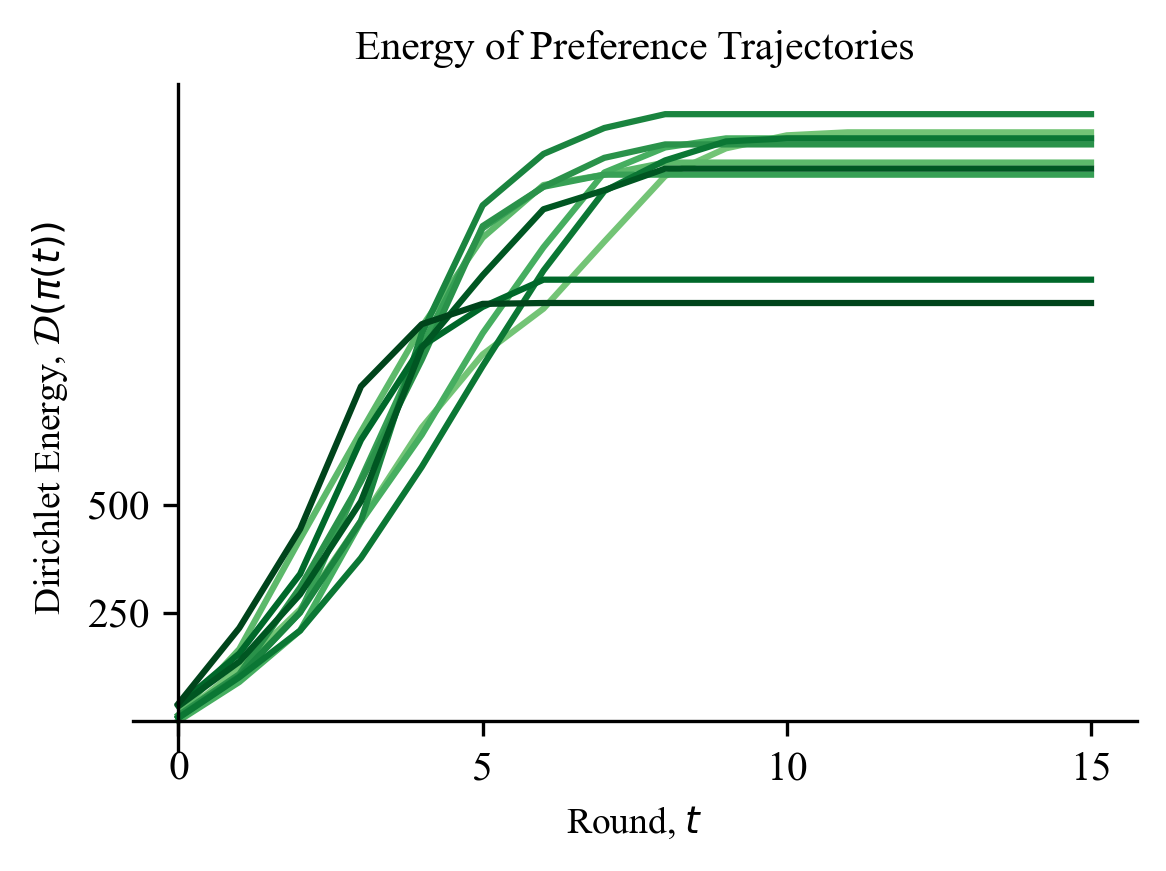

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path for experiment
experiment_number = 4 #change this to create each plot!!!
file_path_exp = 'experiments/experiment_' + str(experiment_number) + '.csv'

# Load the data for experiment
data_exp = pd.read_csv(file_path_exp)

# Load the metadata
file_path_metadata = 'experiments/experiment_' + str(experiment_number) + '_metadata.csv'
metadata = pd.read_csv(file_path_metadata, index_col=0)
# Extract the values for n_agents and n_neighbors
n_agents = metadata.loc['n_agents', 'variable'] if 'n_agents' in metadata.index else None
n_neighbors = metadata.loc['n_neighbors', 'variable'] if 'n_neighbors' in metadata.index else None
n_iterations = metadata.loc['n_iterations', 'variable'] if 'n_iterations' in metadata.index else None

# Find the minimum and maximum loss value for experiment 2 for shifting and labeling
min_loss_exp = data_exp.min().min()
max_loss_exp = data_exp.max().max()

# Plot the data for experiment
plt.figure(figsize=(4, 3), dpi=300)
colors = plt.cm.Greens(np.linspace(0.5, 1, len(data_exp)))  # Create different shades of green

for index, (row, color) in enumerate(zip(data_exp.iterrows(), colors)):
    plt.plot(row[1] - min_loss_exp, color=color)  # Set the line color to different shades of green

# Adding title and labels, and using LaTeX for 'k'
# plt.title(r'Energy of trajectories: $N=' +str(n_agents)+ '$, $k=' + str(n_neighbors) + '$', fontsize=10)
plt.title(r'Energy of Preference Trajectories', fontsize=10)
plt.xlabel(r'Round, $t$', fontsize=9)
plt.ylabel(r'Dirichlet Energy, $\mathcal{D}(\pi(t))$', fontsize=9)

# Label every 5 rounds on the x-axis and include x-axis ticks
plt.xticks(range(0, data_exp.shape[1], 5), labels=[str(i) for i in range(0, data_exp.shape[1], 5)], size='small', rotation=0)

#Label some y-axis values and y-axis ticks
y_ticks = [250,500]
plt.yticks(y_ticks, [str(y) for y in y_ticks])


# Ensure y-axis is visible and align it with x=0
plt.gca().spines['left'].set_visible(True)  # Make the y-axis visible
plt.gca().spines['left'].set_position(('data', 0))  # Align y-axis with x=0

# Remove the legend, grid, and other borders
plt.legend([], [], frameon=False)
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))

# Adjust the layout for the plot
plt.tight_layout()

# Savefig
filename = 'plots/experiment_'+str(experiment_number)+'_plot.png'
plt.savefig(filename)

# Display the plot for experiment
plt.show()


### Plots for ACC Paper

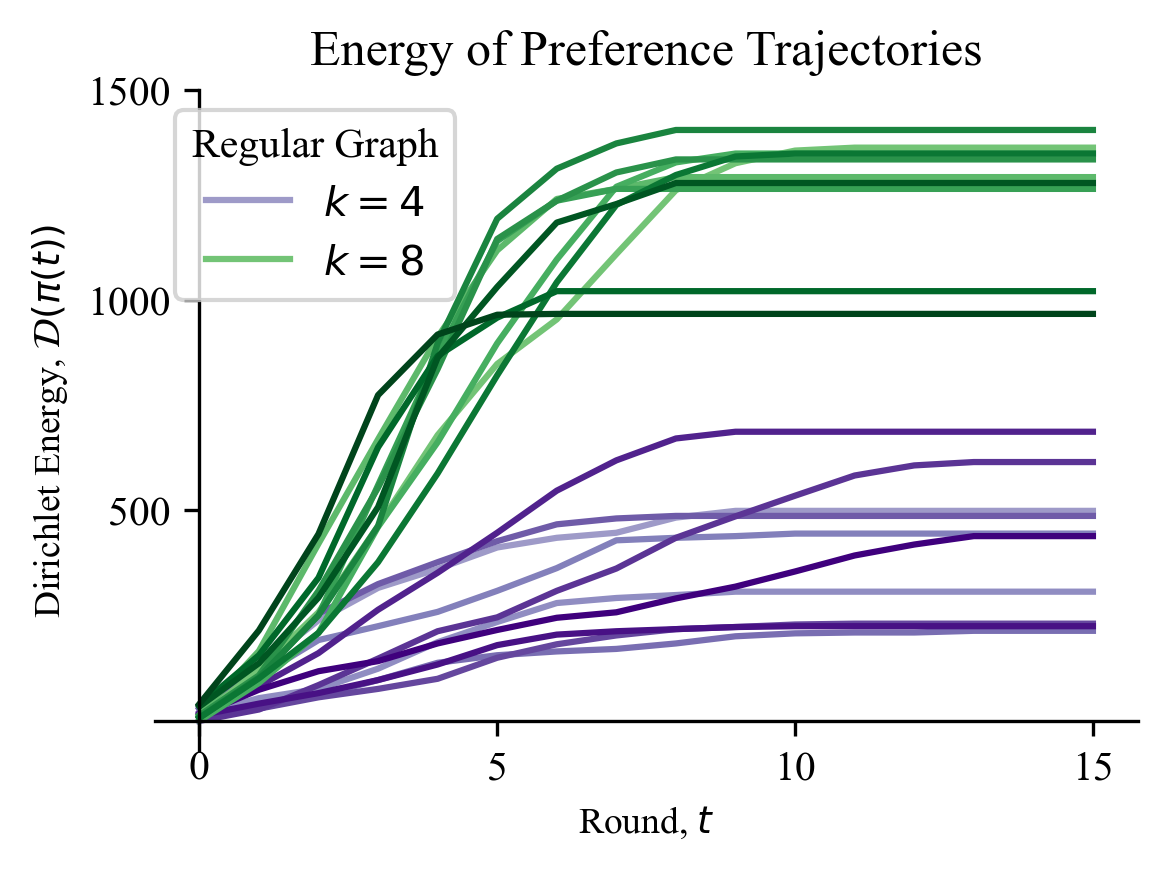

In [112]:
# File paths for experiments
file_paths_exp = ['experiments/experiment_2.csv', 'experiments/experiment_4.csv']
colors_list = [plt.cm.Purples(np.linspace(0.5, 1, 10)), plt.cm.Greens(np.linspace(0.5, 1, 10))]  # Colors for each experiment
legend_labels = ['$k=4$', '$k=8$']  # Legend labels for each experiment

#fonts
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Create a plot
plt.figure(figsize=(4, 3), dpi=300)

# Loop through each experiment and plot the data
for file_path_exp, colors, legend_label in zip(file_paths_exp, colors_list, legend_labels):
    # Load the data for experiment
    data_exp = pd.read_csv(file_path_exp)
    
    # Find the minimum and maximum loss value for shifting and labeling
    min_loss_exp = data_exp.min().min()
    
    for index, (row, color) in enumerate(zip(data_exp.iterrows(), colors)):
        plt.plot(row[1] - min_loss_exp, color=color)  # Set the line color

    # Add a legend entry for the experiment
    plt.plot([], [], color=colors[0], label=legend_label)  # using the first color in the colors list

# Adding title and labels, and using LaTeX for 'k'
plt.title(r'Energy of Preference Trajectories')
plt.xlabel(r'Round, $t$', fontsize=9)
plt.ylabel(r'Dirichlet Energy, $\mathcal{D}(\pi(t))$', fontsize=9)

# Label every 5 rounds on the x-axis and include x-axis ticks
plt.xticks(range(0, data_exp.shape[1], 5), labels=[str(i) for i in range(0, data_exp.shape[1], 5)], size='small', rotation=0)

# Label some y-axis values and y-axis ticks
y_ticks = [500,1000,1500]
plt.yticks(y_ticks, [str(y) for y in y_ticks])

# Ensure y-axis is visible and align it with x=0
plt.gca().spines['left'].set_visible(True)  # Make the y-axis visible
plt.gca().spines['left'].set_position(('data', 0))  # Align y-axis with x=0

# Customize the plot appearance
plt.legend(frameon=True,title='Regular Graph')
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))

# Adjust the layout for the plot
plt.tight_layout()

# Save the figure
filename = 'plots/experiment_2_4_plot.png'
plt.savefig(filename)

# Display the plot for experiment
plt.show()


# Heat Map Network

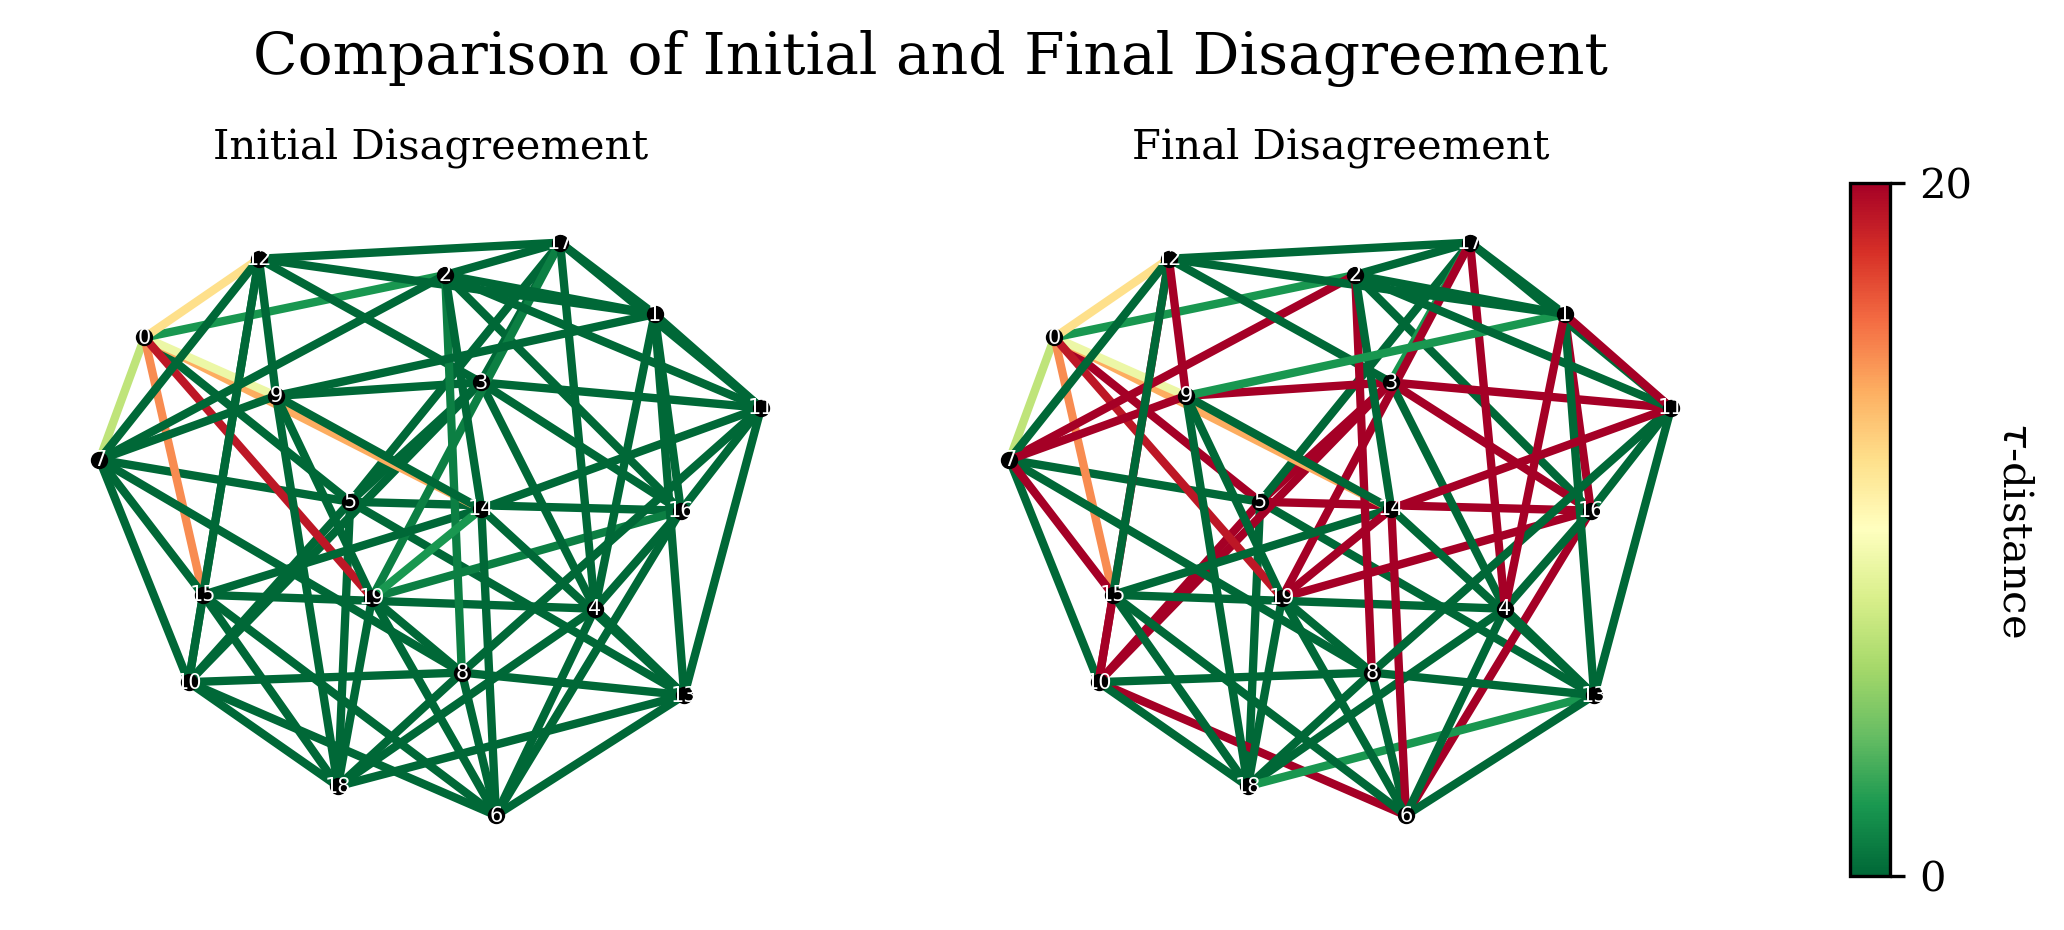

In [5]:
from networkx import Graph, spring_layout, draw_networkx_nodes, draw_networkx_edges, draw_networkx_labels
from ast import literal_eval
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec

plt.rcParams["font.family"] = "serif"

experiment_number = 8 #change this to create each plot!!!

# Load the metadata
file_path_metadata = 'experiments/experiment_'+str(experiment_number)+ '/experiment_' + str(experiment_number) + '_metadata.csv'
metadata = pd.read_csv(file_path_metadata, index_col=0)
# Extract the values for n_agents and n_neighbors
n_agents = metadata.loc['n_agents', 'variable'] if 'n_agents' in metadata.index else None
n_neighbors = metadata.loc['n_neighbors', 'variable'] if 'n_neighbors' in metadata.index else None
n_iterations = int(metadata.loc['n_iterations', 'variable']) if 'n_iterations' in metadata.index else None

# Extract the values for graph
edge_list = literal_eval(metadata.loc['graph', 'variable'] if 'graph' in metadata.index else None)
graph = Graph()
graph.add_edges_from(edge_list)

# Choice of initial condition
trial = 1

# Load the distance matrices
distance_matrices = []
for t in range(n_iterations):
    file_path = 'experiments/experiment_'+str(experiment_number)+ '/experiment_' + str(experiment_number) + '_trial_' + str(trial) + '_t_' + str(t).zfill(2) + '.csv'
    distance_matrix = pd.read_csv(file_path, header=None).values
    distance_matrices.append(distance_matrix)

# First and Last distance matrix
initial_distance_matrix = distance_matrices[0]
final_distance_matrix = distance_matrices[-1]

# Compute the global minimum and maximum across both matrices


global_min = min([np.min(matrix) for matrix in distance_matrices])
global_max = max([np.max(matrix) for matrix in distance_matrices])

# Normalize the distance matrices values to range [0, 1] using the global min and max
norm_initial_distance = (initial_distance_matrix - global_min) / (global_max - global_min)
norm_final_distance = (final_distance_matrix - global_min) / (global_max - global_min)

# Prepare edge colors based on normalized distance
initial_edge_colors = [norm_initial_distance[u][v] for u, v in graph.edges()]
final_edge_colors = [norm_final_distance[u][v] for u, v in graph.edges()]

# Create a gridspec for the plots and the colorbar
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

plt.figure(figsize=[8, 3], dpi=300)
plt.suptitle('Comparison of Initial and Final Disagreement', fontsize=14, y=1.05)

# Plot for initial distance matrix using the first section of the gridspec
ax0 = plt.subplot(gs[0])
pos = spring_layout(graph)
draw_networkx_nodes(graph, pos, node_color='black', node_size=10)
edges = draw_networkx_edges(graph, pos, edge_color=initial_edge_colors, width=2.0, edge_cmap=cm.RdYlGn_r, edge_vmin=0, edge_vmax=1, alpha=1)
draw_networkx_labels(graph, pos, font_color="white", font_size=5)
ax0.set_title('Initial Disagreement', fontsize=10)
ax0.axis('off')

# Plot for final distance matrix using the second section of the gridspec
ax1 = plt.subplot(gs[1])
draw_networkx_nodes(graph, pos, node_color='black', node_size=10)
edges = draw_networkx_edges(graph, pos, edge_color=final_edge_colors, width=2.0, edge_cmap=cm.RdYlGn_r, edge_vmin=0, edge_vmax=1, alpha=1)
draw_networkx_labels(graph, pos, font_color="white", font_size=5)
ax1.set_title('Final Disagreement', fontsize=10)
ax1.axis('off')

# Adding vertical color bar with custom labels using the third section of the gridspec
ax2 = plt.subplot(gs[2])
sm = plt.cm.ScalarMappable(cmap=cm.RdYlGn_r, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, cax=ax2, orientation='vertical', ticks=[0, 1])
cbar.ax.set_yticklabels([f'{global_min:.0f}', f'{global_max:.0f}'])  # Set labels for the ticks
cbar.set_label("Kendall distance", rotation=270, labelpad=15)

# Save and show the plot
plt.savefig('plots/experiment_' + str(experiment_number) + '_trial_' + str(trial) + '_heat_graph_comparison.png')
plt.show()

# Network

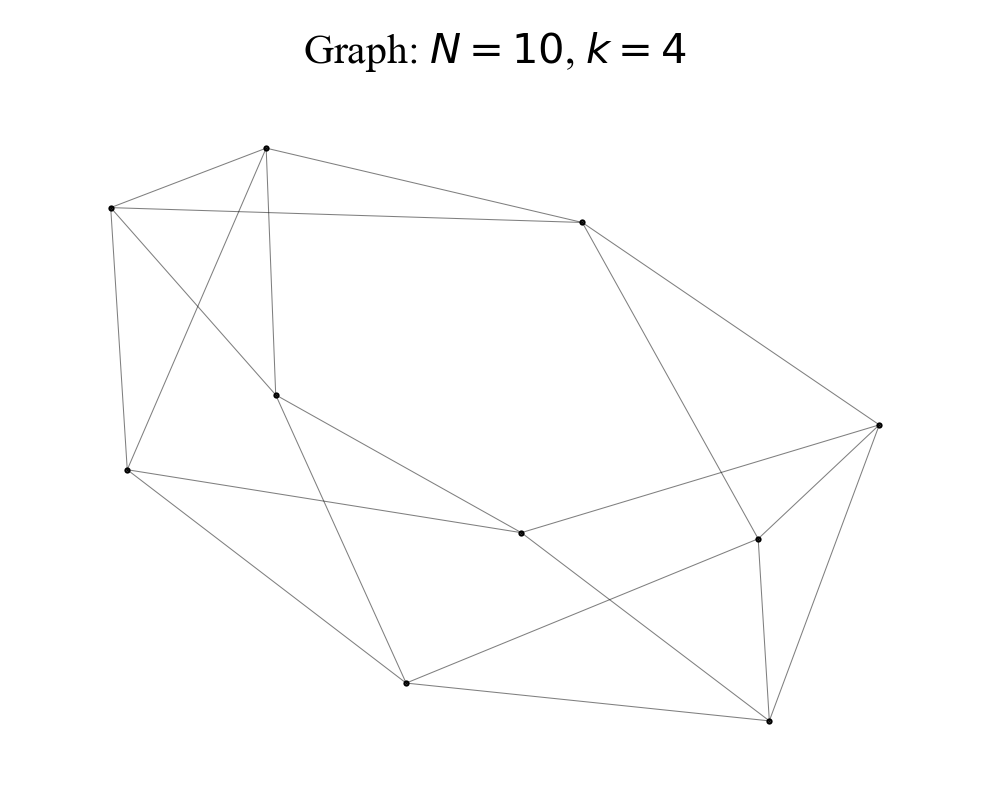

In [114]:
from networkx import circular_layout,spring_layout, draw_networkx_nodes, draw_networkx_edges,Graph
from ast import literal_eval
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

trial = 0

# File path for experiment
experiment_number = 7 #change this to create each plot!!!
file_path_exp = 'experiments/experiment_' + str(experiment_number) + '_trial_' + str(trial) + '_dist'  + '.csv'

# Load the data for experiment
distance_matrix = np.array(pd.read_csv(file_path_exp))

# Load the metadata
file_path_metadata = 'experiments/experiment_' + str(experiment_number) + '_metadata.csv'
metadata = pd.read_csv(file_path_metadata, index_col=0)

# Extract the values for graph
edge_list = literal_eval(metadata.loc['graph', 'variable'] if 'graph' in metadata.index else None)

# Create graph
graph = Graph()
graph.add_edges_from(edge_list)

plt.figure(figsize=[4, 3], dpi=300)
pos = spring_layout(graph)

# Drawing nodes and edges
draw_networkx_nodes(graph, pos, node_color='black', node_size=0.25)
draw_networkx_edges(graph, pos, width=0.25, alpha=0.5)

#title
plt.title(r'Graph: $N=' +str(n_agents)+ '$, $k=' + str(n_neighbors) + '$', fontsize=10)

# Removing the axis
plt.axis('off')

# Save and show the plot
plt.savefig('plots/experiment_' + str(experiment_number) + '_graph.png')
plt.show()


# Medians of Preferences

In [38]:
from networkx.algorithms.tree.branchings import Edmonds
from agents import Preference,Agent,SocialNetwork
from digraphs import generate_random_preorder
import networkx as nx
import matplotlib.pyplot as plt
from functools import reduce

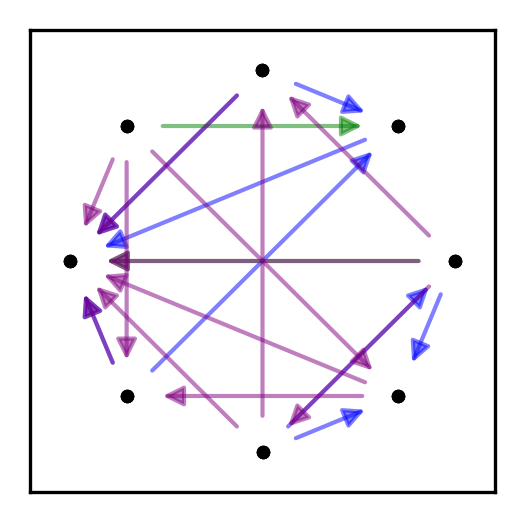

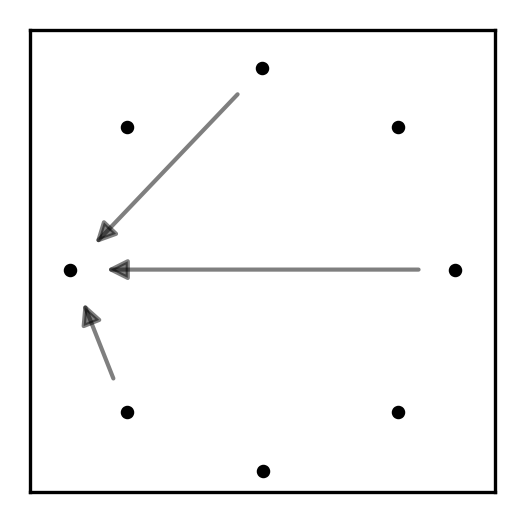

In [41]:
n_alternatives = 8
edge_prob = 0.08

pref_1 = Preference(generate_random_preorder(n_alternatives,edge_prob))
pref_2 = Preference(generate_random_preorder(n_alternatives,edge_prob))
pref_3 = Preference(generate_random_preorder(n_alternatives,edge_prob))
new_pref_1 = pref_1.meet(pref_2)
new_pref_2 = pref_1.meet(pref_3)
new_pref_3 = pref_2.meet(pref_3)
median = reduce(Preference.join,[new_pref_1,new_pref_2,new_pref_3])

fig1,ax1 = plt.subplots(figsize=[2,2],dpi=300)
pref_1.plot(edge_color='blue',ax=ax1)
pref_2.plot(edge_color='green',ax=ax1)
pref_3.plot(edge_color='purple',ax=ax1)    
plt.savefig('plots/median_inputs.png')
plt.show()

fig2,ax2 = plt.subplots(figsize=[2,2],dpi=300)
median.plot(edge_color='black',ax=ax2)  
plt.savefig('plots/median_output.png')
plt.show()


## Tree-Like Preferences

In [50]:
from digraphs import generate_random_arborescence
from agents import Preference
import matplotlib.pyplot as plt
from networkx.algorithms.tree.branchings import Edmonds


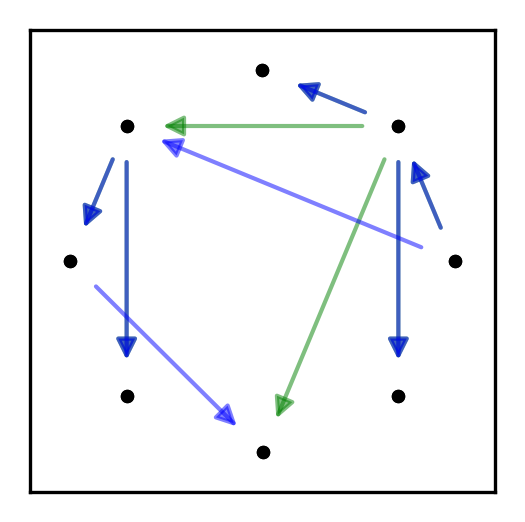

In [51]:
n_alternatives = 8
tree_1 = generate_random_arborescence(n_alternatives)
tree_2 = generate_random_arborescence(n_alternatives)
pref_1 = Preference(tree_1)
pref_2 = Preference(tree_2)
fig,ax = plt.subplots(figsize=[2,2],dpi=300)
pref_1.plot(edge_color='green',ax=ax)
pref_2.plot(edge_color='blue',ax=ax)
plt.show()

# Greedy Algorithms

In [106]:
from networkx import DiGraph,get_edge_attributes
from numpy.random import randn
from agents import Preference,Agent,SocialNetwork
from greedy import Greedy

In [107]:
n_alternatives = 8
step_max = 16
complete_digraph = DiGraph()
for i in range(n_alternatives):
    for j in range(n_alternatives):
        if i!=j:
            complete_digraph.add_edge(i,j,weight=randn())

In [108]:
greedy = Greedy(complete_digraph)

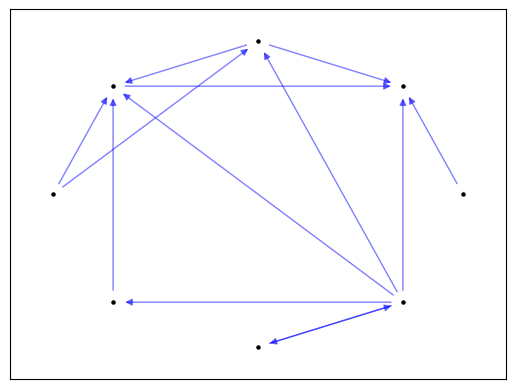

In [109]:
greedy.find_optimum(step_max).plot()

In [110]:
greedy.utility()

9.735811812658048